In [1]:
# Create an empty list to store arrays from each file
data_list = []
import os
import numpy as np

print(os.getcwd())
# Specify the directory
directory = "0.5gcc_1000k_3bR/"
#directory = "/Users/blaubach/chimes_CGD-myLLFork/cluster_analysis/1.0gcc_2000K_3B_graphs/1.0gcc_2000K_3B_graphs/1.0gcc_2000k_3bR/"
#directory = "/Users/blaubach/chimes_CGD-myLLFork/cluster_analysis/2.0gcc_6000K_3B_graphs/2.0gcc_6000k_3bR/"
# Set the desired subsample size
subsample_size = 1000
# Loop over the range of integers from 50 to 74
for i in range(50, 75):
    # Generate the filename
    filename = f'{directory}00{i}.3b_clu-r.txt'
    
    try:
        # Read the data from the file and append it to the list
        data = np.loadtxt(filename)
        sort_data = np.sort(data, axis=1)

        # Subsample the sorted data using random indices
        #random_indices = np.random.choice(sort_data.shape[0], size=subsample_size, replace=False)
        #subsampled_data = sort_data[random_indices, :]
        
        # data_list.append(sort_data) # Account for graph invariance
        #data_list.append(subsampled_data)  # Account for graph invariance
        data_list.append(sort_data)  # Account for graph invariance
    except FileNotFoundError:
        print(f"File not found: {filename}")

# Concatenate the list of arrays along axis 0 (rows)
concat_data = np.concatenate(data_list, axis=0)


# Print the shape of concatenated data
print("Shape:", np.shape(concat_data))
concat_data

/Users/blaubach/chimes_CGD-myLLFork/cluster_analysis/0.5gcc_1000K_3B_graphs/0.5gcc_1000K_3B_graphs
Shape: (19251, 3)


array([[4.44851, 4.85077, 4.90778],
       [2.97423, 3.23091, 4.90778],
       [4.44851, 4.62766, 4.66765],
       ...,
       [2.49198, 2.6107 , 4.15738],
       [4.15738, 4.19719, 4.77817],
       [2.56741, 2.6107 , 4.77817]])

/Users/blaubach/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


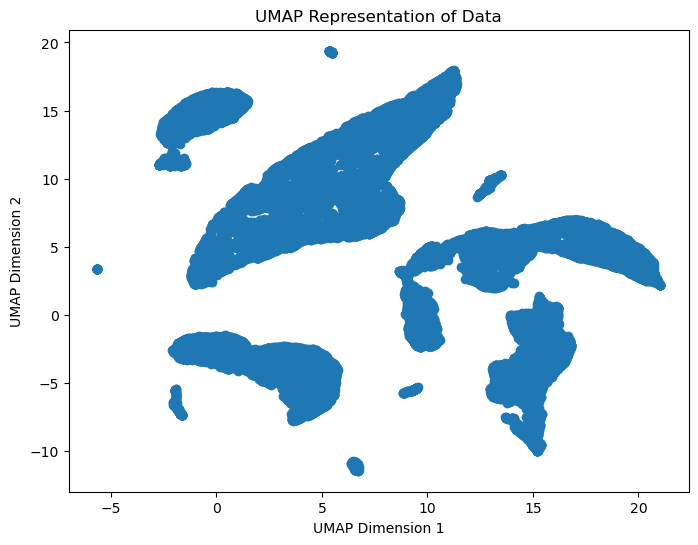

In [2]:
import numpy as np
import umap.umap_ as umap
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your data matrix is called 'data' with size (n, 3)
# where n is the number of samples and 3 is the number of features.

# Create a UMAP model with 2 components (dimensions)
umap_model = umap.UMAP(random_state=42,n_components=2)

# Fit the UMAP model to your data and transform it to 2 dimensions
embedding = umap_model.fit_transform(concat_data)

# Calculate KDE
x = embedding[:,0]
y = embedding[:,1]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
first, second, z = x[idx], y[idx], z[idx]

# corners = np.array([
#     [-3, 17],  # 1
#     [11, 18],  # 7
#     [2, -10],  # 2
#     [22, 0],  # 0
# ])

# test_pts = np.array([
#     (corners[0]*(1-x) + corners[1]*x)*(1-y) +
#     (corners[2]*(1-x) + corners[3]*x)*y
#     for y in np.linspace(0, 1, 10)
#     for x in np.linspace(0, 1, 10)
# ])

# inv_transformed_points = umap_model.inverse_transform(test_pts)

# print(inv_transformed_points)

# Plot the embedded data with colors and shapes based on labels
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
#plt.scatter(first, second, c=z)
plt.scatter(first, second)
# Plot the locations of the text points
#plt.scatter(test_pts[:, 0], test_pts[:, 1], marker='x', c='k', s=15)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP Representation of Data')
plt.show()

# # Create a new DataFrame
# new_df = pd.DataFrame({'Column1': x, 'Column2': y})
# sns.jointplot(x=new_df['Column1'], y=new_df['Column2'], kind='kde')
# plt.xlabel('UMAP Dimension 1')
# plt.ylabel('UMAP Dimension 2')
# plt.show()

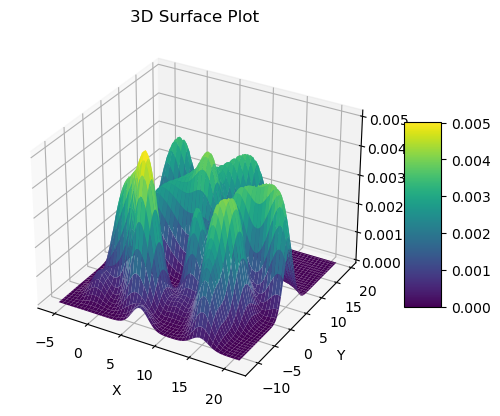

In [3]:
# Create a grid for the surface plot
x_grid, y_grid = np.meshgrid(np.linspace(min(x), max(x), 100), np.linspace(min(y), max(y), 100))
xy_grid = np.vstack([x_grid.ravel(), y_grid.ravel()])
z_grid = gaussian_kde(xy)(xy_grid).reshape(x_grid.shape)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', edgecolor='none')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Surface Plot')

# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


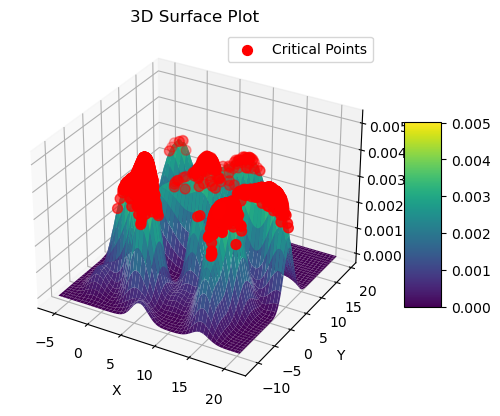

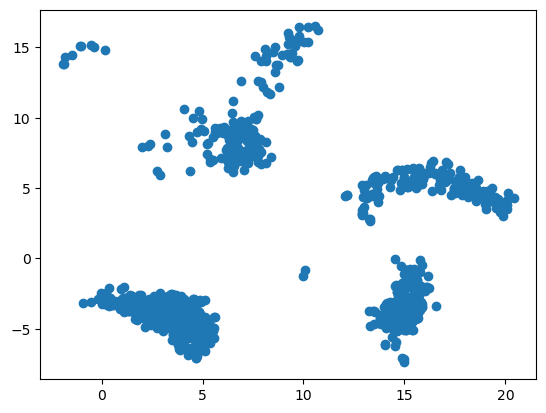

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde
from scipy.signal import find_peaks

# Assuming embedding is your data
x = embedding[:, 0]
y = embedding[:, 1]
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# Find local maxima in z with a minimum prominence
peaks, _ = find_peaks(z, distance=10, height=0.5*z.max())  # Adjust the prominence threshold as needed

# Extract critical points
critical_points_x = x[peaks]
critical_points_y = y[peaks]
critical_points_z = z[peaks]

# Create a grid for the surface plot
x_grid, y_grid = np.meshgrid(np.linspace(min(x), max(x), 100), np.linspace(min(y), max(y), 100))
xy_grid = np.vstack([x_grid.ravel(), y_grid.ravel()])
z_grid = gaussian_kde(xy)(xy_grid).reshape(x_grid.shape)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', edgecolor='none')

# Plot critical points as red points
ax.scatter(critical_points_x, critical_points_y, critical_points_z, color='red', s=50, label='Critical Points')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Surface Plot')

# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

# Add legend
ax.legend()

plt.show()
plt.scatter(critical_points_x,critical_points_y)
plt.show()


Centroid 0: Label 0 - Coordinates: [14.917331  -3.4697912]
Centroid 1: Label 1 - Coordinates: [16.49224   5.096437]
Centroid 2: Label 2 - Coordinates: [ 3.5683515 -4.249114 ]
Centroid 3: Label 3 - Coordinates: [7.0443416 9.50278  ]
Centroid 4: Label 4 - Coordinates: [-1.0962865 14.612281 ]
Centroid 5: Label 5 - Coordinates: [10.041246  -1.0330358]


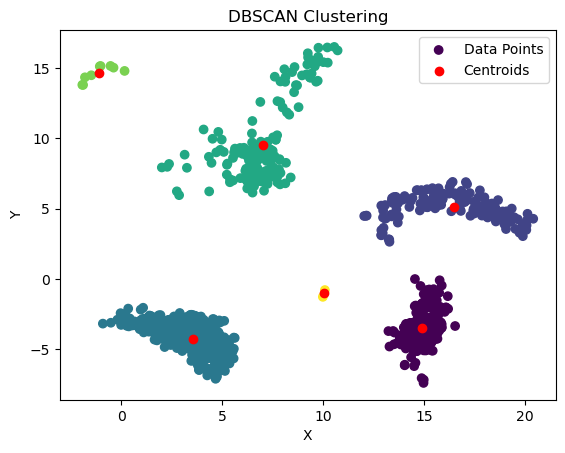

In [5]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Assuming x and y are your data
X = np.column_stack((critical_points_x, critical_points_y))  # Stack x and y to form the input data matrix

db = DBSCAN(eps=2.0, min_samples=2).fit(X)
labels = db.labels_

# Get centroids (the geometric mean of all points in a cluster)
centroids = []
centroid_labels = []
unique_labels = set(labels)
for label in unique_labels:
    if label != -1:  # Exclude noise points (-1)
        cluster_points = X[labels == label]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)
        centroid_labels.append(label)

centroids = np.array(centroids)

# Print centroids and their labels
for i, centroid in enumerate(centroids):
    print(f"Centroid {i}: Label {centroid_labels[i]} - Coordinates: {centroid}")

# Plot data points
plt.scatter(critical_points_x, critical_points_y, c=labels, cmap='viridis', label='Data Points')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='o', label='Centroids')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()

3.200836 4.5135927 4.8093066
40.00172433730972 65.01876979203637 74.97950587065391
3.0890734 4.40141 4.9448123
38.04179666250584 61.40597437994195 80.5522289575522
3.8785791 4.3781004 4.9613633
48.58180963790462 57.830924352950724 73.58726600914466
4.1264777 4.317825 4.5381045
55.47690023262616 59.55346322218214 64.96963654519172
4.027319 4.5388556 4.979476
49.79841242454334 59.40547796181719 70.79610961363946
4.2913303 4.586703 4.87816
53.81656679220491 59.61950884176197 66.56392436603312
3.8182433 4.2859874 4.777356
49.46678688496436 58.55428435472787 71.97892876030777
3.9127579 4.5718966 4.8362007
49.052046633159975 61.95067068675801 68.99728268008201
3.3643231 3.52878 4.5917335
46.717715435763154 49.77998958182593 83.50229498241092
3.5976908 4.4726596 4.6366024
46.48234558120225 64.3590897386148 69.15856468018295
3.9650698 4.320517 4.7094064
51.87521079209388 59.002365315715636 69.1224238921905
4.2230353 4.58175 4.988598
52.1576608577559 58.957055249317165 68.88528389292694
2.90081

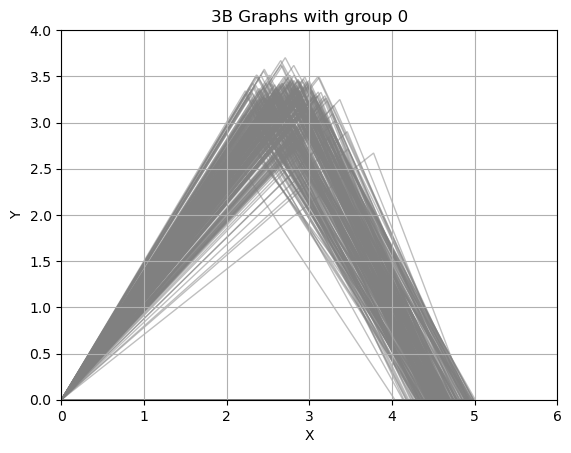

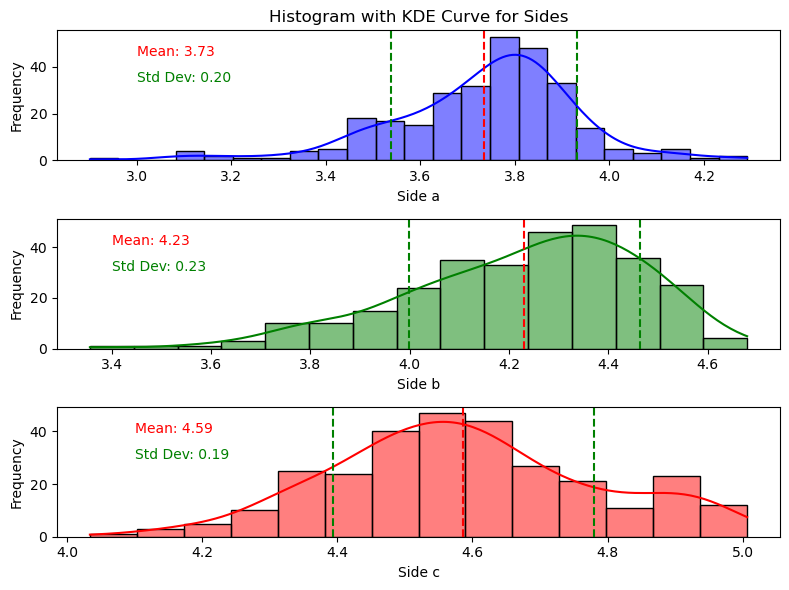

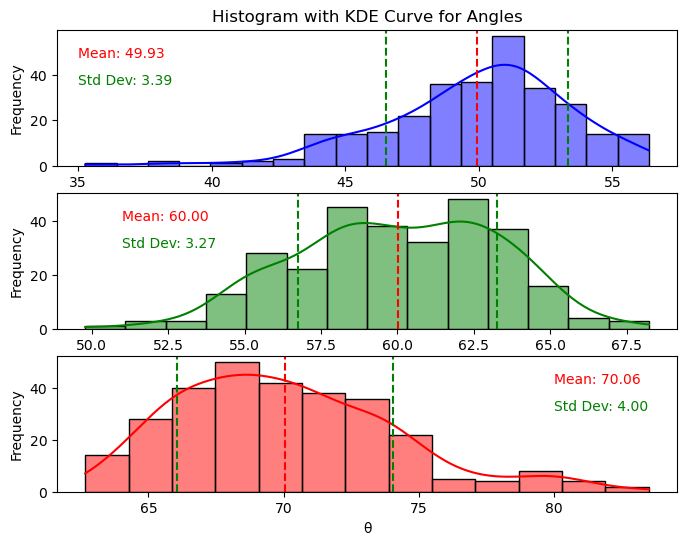

In [72]:
from matplotlib.patches import Polygon
import seaborn as sns

# Function to calculate the angle between two sides of a triangle
def calculate_angle(a, b, c):
    cos_A = (b**2+c**2-a**2)/(2*b*c)
    degree_A = np.arccos(cos_A)*180/np.pi
    sin_A = np.sin(degree_A*np.pi/180)
    sin_B = sin_A*b/a
    degree_B = np.arcsin(sin_B)*180/np.pi
    degree_C = 180 - degree_A - degree_B
    return degree_A, degree_B, degree_C

def coordinates_of_triangle_given_SSS(a, b, c):
    """a, b and c are lengths of the sides of a triangle"""

    A = (0, 0) # coordinates of vertex A

    B = (c, 0) # coordinates of vertex B

    C_x = b * float(b**2 + c**2 - a**2) / (2 * b * c)
    C_y = float(np.sqrt(b**2 - C_x**2)) # square root

    C = (float(C_x), float(C_y)) # coordinates of vertex C

    vertices = np.array([A,B,C])
    return vertices


for label in labels:
    a_side_lengths = []
    b_side_lengths = []
    c_side_lengths = []
    a_angle = []
    b_angle = []
    c_angle = []
    critical_points_x_label = critical_points_x[labels == 0]
    critical_points_y_label = critical_points_y[labels == 0]
    # Create a NumPy array of zeros with the desired shape
    array = np.zeros((len(critical_points_x_label), 2)) 
    array[:, 0] = critical_points_x_label
    array[:, 1] = critical_points_y_label
    inv_transformed_points = umap_model.inverse_transform(array)
    fig, ax = plt.subplots()
    for row in inv_transformed_points:
        a, b, c = row
        print(a,b,c)
        a_side_lengths.append(a)
        b_side_lengths.append(b)
        c_side_lengths.append(c)
        coords = coordinates_of_triangle_given_SSS(a, b, c)
        edge_color = (0.5, 0.5, 0.5, 0.5)  # RGBA tuple for transparent grey
        p = Polygon(coords, edgecolor=edge_color, facecolor='none')
        ax.add_patch(p)
        angle1, angle2, angle3 = calculate_angle(a, b, c)
        print(angle1, angle2, angle3)
        a_angle.append(angle1)
        b_angle.append(angle2)
        c_angle.append(angle3)
    # Set plot limits
    plt.xlim(0, 15)
    plt.ylim(0, 15)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'3B Graphs with group {label}')

    plt.grid(True)
    plt.xlim(0,6)
    plt.ylim(0,4)
    plt.show()

    # Plot histograms for a, b, and c values
    fig, axes = plt.subplots(3, 1, figsize=(8, 6))
    # Plot histogram with KDE curve using Seaborn
    sns.histplot(a_side_lengths, kde=True, color='blue', ax=axes[0])

    # Add annotations for mean and standard deviation
    mean_a = np.mean(a_side_lengths)
    std_a = np.std(a_side_lengths)
    axes[0].axvline(mean_a, color='red', linestyle='--', label=f'Mean: {mean_a:.2f}')
    axes[0].axvline(mean_a + std_a, color='green', linestyle='--', label=f'Std Dev: {std_a:.2f}')
    axes[0].axvline(mean_a - std_a, color='green', linestyle='--')
    axes[0].text(3.0, 0.8 * axes[0].get_ylim()[1], f'Mean: {mean_a:.2f}', color='red', ha='left')
    axes[0].text(3.0, 0.6 * axes[0].get_ylim()[1], f'Std Dev: {std_a:.2f}', color='green', ha='left')  

    # Add labels and legend
    axes[0].set_xlabel('Side a')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Histogram with KDE Curve for Sides')

    # Plot histogram with KDE curve using Seaborn
    sns.histplot(b_side_lengths, kde=True, color='green', ax=axes[1])

    # Add annotations for mean and standard deviation
    mean_b = np.mean(b_side_lengths)
    std_b = np.std(b_side_lengths)
    axes[1].axvline(mean_b, color='red', linestyle='--', label=f'Mean: {mean_b:.2f}')
    axes[1].axvline(mean_b + std_b, color='green', linestyle='--', label=f'Std Dev: {std_b:.2f}')
    axes[1].axvline(mean_b - std_b, color='green', linestyle='--')
    axes[1].text(3.4, 0.8 * axes[1].get_ylim()[1], f'Mean: {mean_b:.2f}', color='red', ha='left')
    axes[1].text(3.4, 0.6 * axes[1].get_ylim()[1], f'Std Dev: {std_b:.2f}', color='green', ha='left')  

    # Add labels and legend
    axes[1].set_xlabel('Side b')
    axes[1].set_ylabel('Frequency')

    # Plot histogram with KDE curve using Seaborn
    sns.histplot(c_side_lengths, kde=True, color='red', ax=axes[2])

    # Add annotations for mean and standard deviation
    mean_c = np.mean(c_side_lengths)
    std_c = np.std(c_side_lengths)
    axes[2].axvline(mean_c, color='red', linestyle='--', label=f'Mean: {mean_c:.2f}')
    axes[2].axvline(mean_c + std_c, color='green', linestyle='--', label=f'Std Dev: {std_c:.2f}')
    axes[2].axvline(mean_c - std_c, color='green', linestyle='--')
    axes[2].text(4.1, 0.8 * axes[2].get_ylim()[1], f'Mean: {mean_c:.2f}', color='red', ha='left')
    axes[2].text(4.1, 0.6 * axes[2].get_ylim()[1], f'Std Dev: {std_c:.2f}', color='green', ha='left')  


    # Add labels and legend
    axes[2].set_xlabel('Side c')
    axes[2].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    # Plot histograms for a, b, and c values
    fig, axes = plt.subplots(3, 1, figsize=(8, 6))
    # Plot histogram with KDE curve using Seaborn
    sns.histplot(a_angle, kde=True, color='blue', ax=axes[0])

    # Add annotations for mean and standard deviation
    mean_a = np.mean(a_angle)
    std_a = np.std(a_angle)
    axes[0].axvline(mean_a, color='red', linestyle='--', label=f'Mean: {mean_a:.2f}')
    axes[0].axvline(mean_a + std_a, color='green', linestyle='--', label=f'Std Dev: {std_a:.2f}')
    axes[0].axvline(mean_a - std_a, color='green', linestyle='--')
    axes[0].text(35, 0.8 * axes[0].get_ylim()[1], f'Mean: {mean_a:.2f}', color='red', ha='left')
    axes[0].text(35, 0.6 * axes[0].get_ylim()[1], f'Std Dev: {std_a:.2f}', color='green', ha='left')  

    # Add labels and legend
    axes[0].set_xlabel('θ1')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Histogram with KDE Curve for Angles')

    # Plot histogram with KDE curve using Seaborn
    sns.histplot(b_angle, kde=True, color='green', ax=axes[1])

    # Add annotations for mean and standard deviation
    mean_b = np.mean(b_angle)
    std_b = np.std(b_angle)
    axes[1].axvline(mean_b, color='red', linestyle='--', label=f'Mean: {mean_b:.2f}')
    axes[1].axvline(mean_b + std_b, color='green', linestyle='--', label=f'Std Dev: {std_b:.2f}')
    axes[1].axvline(mean_b - std_b, color='green', linestyle='--')
    axes[1].text(51, 0.8 * axes[1].get_ylim()[1], f'Mean: {mean_b:.2f}', color='red', ha='left')
    axes[1].text(51, 0.6 * axes[1].get_ylim()[1], f'Std Dev: {std_b:.2f}', color='green', ha='left')  

    # Add labels and legend
    axes[1].set_xlabel('θ2')
    axes[1].set_ylabel('Frequency')

    # Plot histogram with KDE curve using Seaborn
    sns.histplot(c_angle, kde=True, color='red', ax=axes[2])

    # Add annotations for mean and standard deviation
    mean_c = np.mean(c_angle)
    std_c = np.std(c_angle)
    axes[2].axvline(mean_c, color='red', linestyle='--', label=f'Mean: {mean_c:.2f}')
    axes[2].axvline(mean_c + std_c, color='green', linestyle='--', label=f'Std Dev: {std_c:.2f}')
    axes[2].axvline(mean_c - std_c, color='green', linestyle='--')
    axes[2].text(80, 0.8 * axes[2].get_ylim()[1], f'Mean: {mean_c:.2f}', color='red', ha='left')
    axes[2].text(80, 0.6 * axes[2].get_ylim()[1], f'Std Dev: {std_c:.2f}', color='green', ha='left')  


    # Add labels and legend
    axes[2].set_xlabel('θ')
    axes[2].set_ylabel('Frequency')

    plt.show()
    break
            
    


[[3.7773414 4.285099  4.52995  ]
 [2.5198486 4.1369004 4.4905887]
 [1.3052776 2.5364828 3.7785385]
 [1.2715739 3.9800558 4.8026295]
 [1.2410978 1.3259761 2.5846343]
 [2.5210567 2.616112  4.8618584]]
Number of Clusters:  6
3.7773414 4.285099 4.52995
2.5198486 4.1369004 4.4905887
1.3052776 2.5364828 3.7785385
1.2715739 3.9800558 4.8026295
1.2410978 1.3259761 2.5846343
2.5210567 2.616112 4.8618584


/var/folders/qt/6k9t6mfn12l30tsrj8hnl6wh0000gs/T/ipykernel_43810/26126812.py:11: RuntimeWarning: invalid value encountered in sqrt
  C_y = float(np.sqrt(b**2 - C_x**2)) # square root


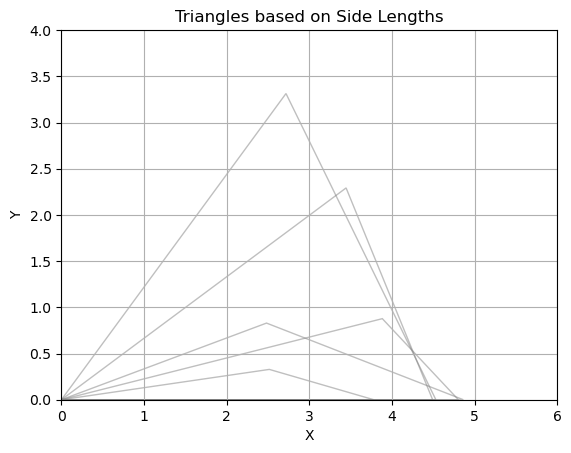

In [7]:
from matplotlib.patches import Polygon

def coordinates_of_triangle_given_SSS(a, b, c):
    """a, b and c are lengths of the sides of a triangle"""

    A = (0, 0) # coordinates of vertex A

    B = (c, 0) # coordinates of vertex B

    C_x = b * float(b**2 + c**2 - a**2) / (2 * b * c)
    C_y = float(np.sqrt(b**2 - C_x**2)) # square root

    C = (float(C_x), float(C_y)) # coordinates of vertex C

    vertices = np.array([A,B,C])
    return vertices

fig, ax = plt.subplots()

inv_transformed_points = umap_model.inverse_transform(centroids)
print(inv_transformed_points)

print("Number of Clusters: ", len(inv_transformed_points))

for row in inv_transformed_points:
    a, b, c = row
    print(a,b,c)
    coords = coordinates_of_triangle_given_SSS(a, b, c)
    edge_color = (0.5, 0.5, 0.5, 0.5)  # RGBA tuple for transparent grey
    p = Polygon(coords, edgecolor=edge_color, facecolor='none')
    ax.add_patch(p)

# Set plot limits
plt.xlim(0, 15)
plt.ylim(0, 15)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Triangles based on Side Lengths')

plt.grid(True)
plt.xlim(0,6)
plt.ylim(0,4)
plt.show()